In [1]:
import os
import sklearn.model_selection
import numpy as np
import pandas as pd
import utils
import rectools.models
import rectools.metrics
import implicit
import matplotlib.pyplot as plt
from IPython.display import clear_output


RANDOM_STATE = 1337
NUM_JOBS = -1

os.environ['DIR'] = "/home/ml/softezza_ml/"
os.environ['DB_ENDPOINT'] = "apollo-api-staging-f82be878-d243-4113-8052-ef36565618e0.cpljy7lbflfq.eu-west-1.rds.amazonaws.com"
os.environ['DB_PORT'] = '3306'
os.environ['DB_USER'] = "admin"
os.environ['DB_PASSWORD'] = 'zsfZMSpS0SGz8gp203QJ4r3bqpVNxwmG'
os.environ['DB_NAME'] = "vapor"

DATA_DIR = os.path.join(os.environ['DIR'], 'data')
REPORTS_DIR = os.path.join(os.environ['DIR'], 'reports')

DATA_DIR, REPORTS_DIR

('/home/ml/softezza_ml/data', '/home/ml/softezza_ml/reports')

In [2]:
config = utils.DataConfig(
    concat_stages=True,
    use_popular_penalty=False
)

data = utils.load_data(config)
data.train_interactions.head()

Data after filter:
Len of train interactions with period [58094945   2023-10-04 11:31:36
Name: timestamp, dtype: datetime64[ns] / Series([], Name: timestamp, dtype: datetime64[ns])] - 58094946
Len of test interactions with period [Series([], Name: timestamp, dtype: datetime64[ns]) / Series([], Name: timestamp, dtype: datetime64[ns])] - 0
Num of uniq users 660818Num of uniq items 13457


,user_id,item_id,timestamp,weight
0,883201,tt0086250,2022-04-30 06:07:53,0.352843
1,883201,tt1478839,2022-04-30 06:07:53,0.407645
2,883201,tt2328900,2022-04-30 06:07:53,0.111828
3,888601,tt2283362,2019-12-22 02:22:17,0.990000
4,891701,tt3741700,2019-10-04 04:47:56,0.010000


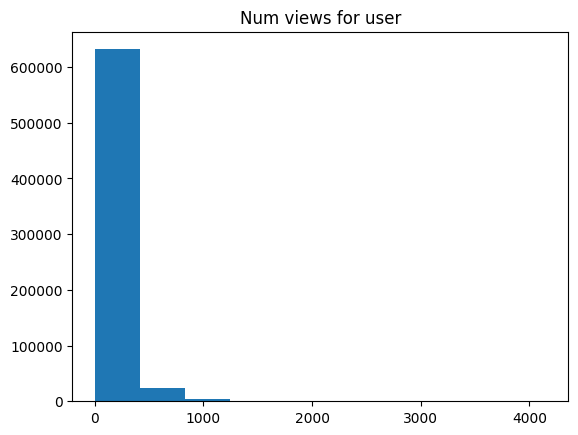

In [3]:
plt.title('Num views for user')
plt.hist(data.train_interactions.value_counts('user_id'));

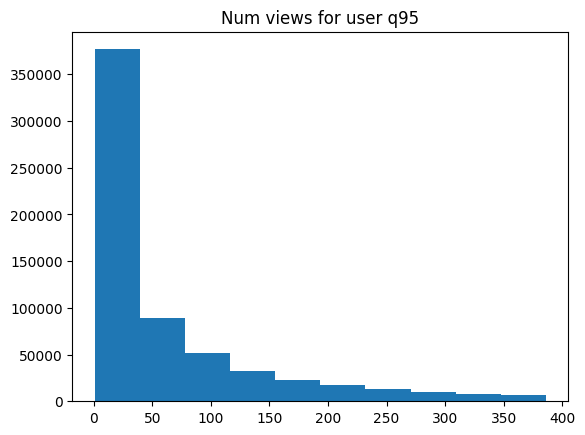

In [7]:
plt.title('Num views for user q95')
counts = data.train_interactions.value_counts('user_id')
plt.hist(counts[counts.values < counts.quantile(0.95)]);

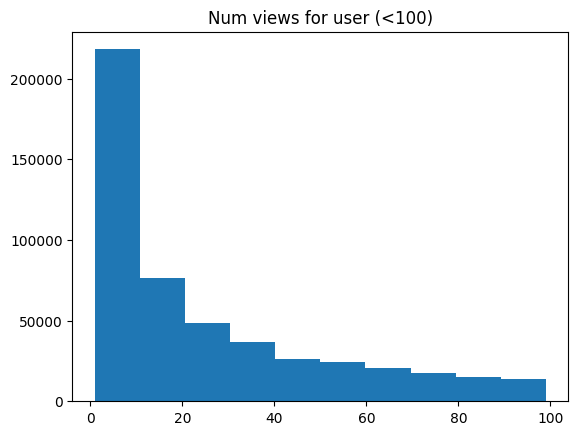

In [8]:
plt.title('Num views for user (<100)')
plt.hist(counts[counts.values < 100]);

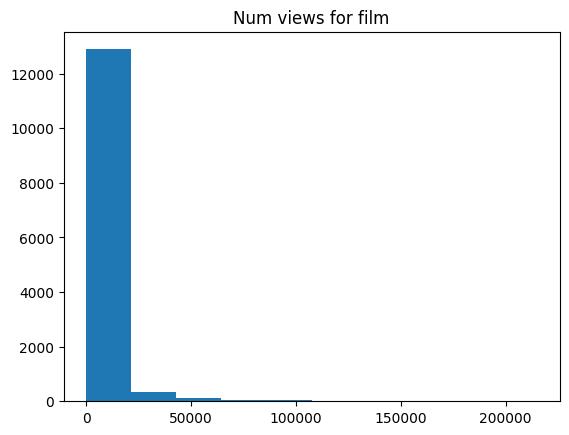

In [9]:
plt.title('Num views for film')
plt.hist(data.train_interactions.value_counts('item_id'));

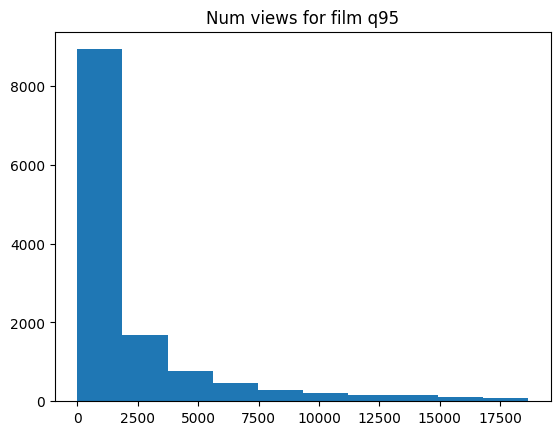

In [10]:
plt.title('Num views for film q95')
counts = data.train_interactions.value_counts('item_id')
plt.hist(counts[counts.values < counts.quantile(0.95)]);

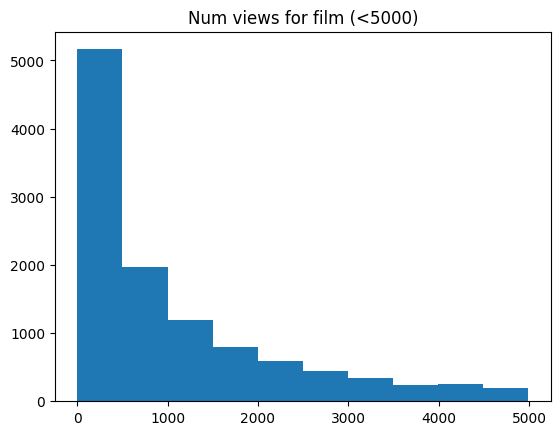

In [11]:
plt.title('Num views for film (<5000)')
plt.hist(counts[counts.values < 5000]);

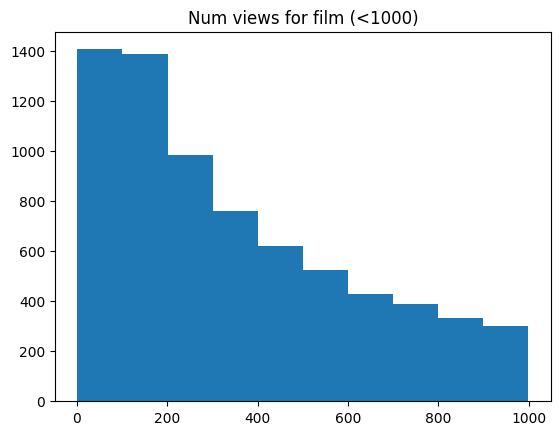

In [12]:
plt.title('Num views for film (<1000)')
plt.hist(counts[counts.values < 1000]);